# CS 237 Fall 2020   Homework Eight


### Due date: Due Friday April 3rd at midnight with 3 day grace period (until Monday midnight)

### No late hws, I have to post the solutions!  

### General Instructions

Please complete this notebook by filling in solutions where indicated. Be sure to "Run All" from the Cell menu before submitting. 


In [15]:
# Here are some imports which will be used in code that we write for CS 237

import matplotlib.pyplot as plt   # normal plotting
import numpy as np
import pandas as pd

from math import log, pi, log, floor, ceil       # import whatever you want from math
from random import seed, random
from collections import Counter


%matplotlib inline

from scipy.special import comb
           
def C(N,K):    
    return comb(N,K,True)     # just a wrapper around the scipy function


def round4(x):
    return np.around(x,4)


# Here are the basic statistical functions we will use from numpy

from numpy import mean, var, std, median

L = [2,4,3,6,4,5]

# mean value

mean(L)          


# Variance
#  ddof = delta degrees of freedom, default is 0

# population variance
var(L)      

# sample variance
var(L,ddof=1)

# Standard deviation
#  ddof = delta degrees of freedom, default is 0

# population standard deviation
std(L)      

# sample standard deviation
std(L,ddof=1)  

# Median

median(L)  

# Random sampling of `size` elements from list with or without replacement

np.random.choice(L,size=1,replace=True)
       
# Scipy statistical functions

from scipy.stats import norm, binom, expon, geom, poisson, gamma, nbinom, bernoulli                 

# https://docs.scipy.org/doc/scipy/reference/stats.html

#### Normal Distribution    #####

######   Note that in this library loc = mean and scale = standard deviation  #####

# Examples assume random variable X (e.g., housing prices) normally distributed with  mu = 60, sigma = 10

# Probability Density Function    (really only useful for drawing the curve)
#  f(x) = P(X == x)

norm.pdf(x=50,loc=60, scale= 10)     

# Cumulative Density Function
#  F(x) = P(X < x)

# Example:  Percentage of houses less than 50K. 
norm.cdf(x=50,loc=60,scale=10) 

# Example:  Find P(60<X<80)
norm.cdf(x=80,loc=60,scale=40) - norm.cdf(x=60,loc=60,scale=40)

# Survival Function: Simply 1 - CDF, i.e., P(X > x)

# Example:  Percentage of houses more than 50K.
norm.sf(x=50,loc=60,scale=10) 

# Percentage Point Function: Inverse of the CDF:
# For what is the largest value of k for which P( X < k ) = q  ?

# Example: What is the maximum cost of the 5% cheapest houses, 
# i.e., the x such that P(X < x) = 0.05?

norm.ppf(q=0.05,loc=60,scale=40)

# Inverse Survival Function: Inverse (1 - CDF):
# For what is the smallest value of k for which P( X > k ) = q  ?

# Example: What is the minimum cost of the 5% most expensive houses, 
# i.e., the x such that P(X > x) = 0.05?

norm.isf(q=0.05,loc=60,scale=40)

#   Give the endpoints of the interval (centered on the mean)
#   which contain alpha/100 percent of the population (alpha is a probability)

# Ex. Give the interval for the middle 75% of the houses

norm.interval(alpha=0.75, loc=60, scale=40)

# generate a random variate
norm.rvs(loc=60, scale=40)

# generate random variates, returns list of length = size
norm.rvs(loc=60, scale=40, size=10)




#####   Exponential Distribution     ########

#####  loc = minimum value (leave at 0 always)               ##### 
#####  scale = mean = 1 / lambda (using textbook notation)   #####

# Probability Density Function  f(x)       (Only useful for graphing and showing shape)

lam = 4
expon.pdf(x=5,loc=0, scale=1/lam)        # Must use 'scale = 1/lambda' to be consistent with textbook and lecture  

# Cumulative Density Function
#  F(x) = P(X < x)

expon.cdf(x=5,loc=0,scale=1/lam) 

# Example:  Find P(6<X<8)
expon.cdf(x=8,loc=0,scale=1/lam) - expon.cdf(x=6,loc=0,scale=1/lam)

# Percentage Point Function: Inverse of the CDF:
# For which value of x does P( X < x ) = q  ?

expon.ppf(q=0.05,loc=0,scale=1/lam)

# Survival Function: Simply 1 - CDF, i.e., P(X > x)

expon.sf(x=5,loc=0,scale=1/lam) 

# Inverse Survival Function: Inverse (1 - CDF):
# For what is the value of k for which P( X > k ) = q  ?

expon.isf(q=0.05,loc=0,scale=1/lam)

#g. generate a random variate
expon.rvs(loc=0, scale=1/lam)

#h. generate random variates, returns list of length = size
expon.rvs(loc=0, scale=1/lam, size=10)

# Same for Poisson, nbinom, gamma, bernoulli, etc. as shown here:

##### Bernoulli Distribution  X ~ Bernoulli(p)  ####

#  p = probability of success for Bernoulli trial

# Generate a random variate
bernoulli.rvs(p=0.5)

# Generate a list of random variates
bernoulli.rvs(p=0.5,size=100)

##### Binomial Distribution  X ~ B(n,p)  ####

#  n = number of independent Bernoulli trials
#  p = probability of success for Bernoulli trial
#  k = outcome in range [0 .. n]

# Generate a random variate
binom.rvs(n=10, p=0.5)

# Generate a list of random variates
binom.rvs(n=10, p=0.5,size=100)

# Probability mass function.
binom.pmf(k=4, n=10, p=0.5)

# Cumulative distribution function
binom.cdf(k=4, n=10, p=0.5)

print()

## Problem One (Sampling Theory) 

This problem considers three different ways of answering a question about samples from an infinite population. Suppose you flip a fair coin 120 times. What is the probability that 75 or more of the flips will be heads?

(A) First solve this problem precisely using the binomial, showing your formula (you'll need to use Python -- look at the end of the previous cell above to see some useful functions). 

(B) Next, solve the problem by using the normal approximation to the binomial (using the continuity correction). 

Finally, we will solve this as a problem in sampling: let $X$ be a Bernoulli (each coin flip) and let 

$$\overline{X} = {X_1 + \cdots + X_{120})\over 120},$$ so that by the CLT, $\overline{X}\sim N(\mu,\sigma^2)$
for some mean $\mu$ and variance $\sigma^2$. 

(C) Give the mean $\mu$ and variance $\sigma^2$.

(D)  Now calculate the answer using the CLT, using the continuity correction
(where effectively the bins have width 1/120, so you should adjust the boundary by
one half the width of the bin), and give the absolute percentage error (defined in problem 9 of hw 7).  

Hint: You should get the same answer for (B) and (D); they will be close to, but not the same as, the "ground truth" answer in (A). 

In [16]:
#A
a1 = round(1 - binom.cdf(k=75, n=120, p=0.5),4)
print("A: ", a1)
print()

#B
b1 = round(norm.sf(x=74.5,loc=(120*0.5),scale=(0.5*0.5*120)),4)
print("B: ", b1)
print()

#C
mean1 = 0.5
var1 = 0.5
print("C: ")
print("Mean: ", mean1)
print("Variance: ", var1)
print()

#D
d1 = np.round(norm.sf(x=(5/8 - ((1/120)*0.5)),loc=0.5,scale=0.25),4)
print("D: ", d1)

A:  0.0022

B:  0.3144

C: 
Mean:  0.5
Variance:  0.5

D:  0.3144


## Problem Two (Confidence Intervals) 

Suppose an experiment is conducted where 100 students at BU are measured and their average height is found to be 67.45 inches, and  the (sample) standard deviation to be 2.93 inches. Since 100 is a large sample, we use
the sample standard deviation as an estimate of the population standard deviation. We may assume that heights are normally distributed.

(A) Suppose that you want to report the 95.45...% confidence interval (i.e., exactly 2 standard deviations). Give the results of this experiment as described in lecture. 

(B) Now suppose you want to report the precisely 95.0% confidence interval (which will be slightly less than 2 standard deviations -- find out the exact figure) Repeat (A) using this confidence interval. 


#### A
$Sample Size = 100$

$CL = 95.45..%$

$k = 2$

$\bar{x} = 67.45$

$s = 2.93$

$s_{\bar{x}} = \frac{2.93}{\sqrt{100}} = 0.293$

**The mean height of the population is 67.45 +/- 0.586 inches with a confidence of 95.45%**



#### B
$Sample Size = 100$

$CL = 95.0%$

$\bar{x} = 67.45$

$s = 2.93$

$s_{\bar{x}} = \frac{2.93}{\sqrt{100}} = 0.293$

$k =$

In [17]:
np.round(norm.interval(alpha=0.95,loc=0,scale=1),4)

array([-1.96,  1.96])

**The mean height of the population is 67.45 +/- 0.57428 inches with a confidence of 95%**

## Problem Three (Confidence Intervals)

Suppose we want to estimate the lifetime of Apple iPads. An experiment is done where we sample 300 iPads to see how long they last, and the mean of this sample is found to be 3245.9 hours and the sample standard deviation to be 548.82 hours. 

(A) Report the mean lifetime of Apple iPads at a 95% level of confidence.

(B) Report the same at a 99% level of confidence.

In [18]:
import math 

ss = 300
avx = 3245.9
s = 548.82
sx = s / math.sqrt(ss)

#A
acl = 95
l1 = np.round(norm.interval(alpha=0.95,loc=0,scale=1),4)
ka = l1[1]
print("A:")
print("Sample Size: ", ss)
print("Average X: ", avx)
print("Standard Deviation: ", s)
print("Mean Standard Deviation: ", sx)
print("k: ", ka)
print()
print("The mean lifetime of Apple iPads is", avx, "+/-", (np.round(ka * sx,4)), "hours, with a confidence level of", acl, "%")
print()
print()


#B
bcl = 99
l2 = np.round(norm.interval(alpha=0.99,loc=0,scale=1),4)
kb = l2[1]
print("B:")
print("Sample Size: ", ss)
print("Average X: ", avx)
print("Standard Deviation: ", s)
print("Mean Standard Deviation: ", sx)
print("k: ", kb)
print()
print("The mean lifetime of Apple iPads is", avx, "+/-", (np.round(kb * sx,4)), "hours, with a confidence level of", bcl, "%")

A:
Sample Size:  300
Average X:  3245.9
Standard Deviation:  548.82
Mean Standard Deviation:  31.686137473665042
k:  1.96

The mean lifetime of Apple iPads is 3245.9 +/- 62.1048 hours, with a confidence level of 95 %


B:
Sample Size:  300
Average X:  3245.9
Standard Deviation:  548.82
Mean Standard Deviation:  31.686137473665042
k:  2.5758

The mean lifetime of Apple iPads is 3245.9 +/- 81.6172 hours, with a confidence level of 99 %


## Problem Three

The GPAs for 4897 individuals from an institution of higher education in the northeastern United States is given in StudentGPAData.csv (the first column gives the Gender, and the second the GPA--you only need the GPA data).


In [19]:
studs = pd.read_csv('http://www.cs.bu.edu/fac/snyder/cs237/Homeworks,%20Labs,%20and%20Code/data/StudentData.csv')
gpaList = studs['GPA'].tolist()

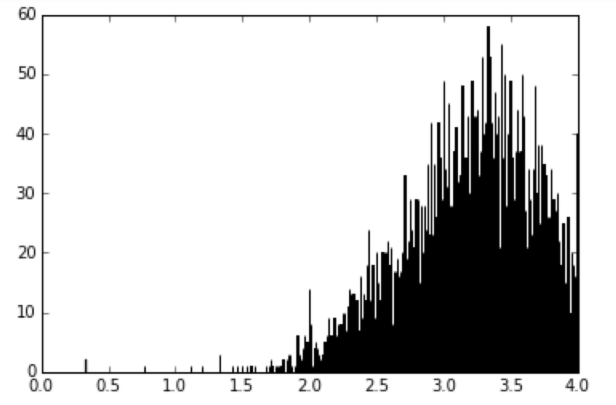

We will use this data (just the list of GPAs) for exploring the various ideas presented in lecture about sampling theory and confidence intervals.  

**You should use the scipy statistics functions (mean, var, std) shown in the code cell at the top of this document. Note carefully how population and sample standard deviations are calculated there.** 

(a) Calculate the mean and (population) standard deviation of this population and print them out to 4 decimal places. These are your benchmark values for the actual parameters of the population. 

(b) Write a function <code>getSample(n)</code> to generate ONE random sample of n samples from <code>gpaList</code>,  and return the sample mean and the sample standard deviation as a pair (see template below). Using the techniques developed in lecture, report on your estimation of the population mean using a confidence interval for 95% (NOT 95.14....%) confidence. Simply print out the confidence interval result for one random sample of size n = 30, as shown in lecture. (Do NOT use the data from (a) for this, remember, you are taking the sample because you supposedly can't get the whole population.) 

Hint: Use the function <code>numpy.random.choice(L,n,replace=True)</code>, which takes a list L and returns n random values, chosen equiprobably and with replacement. 

(c) Write a function <code>getInterval(CL,n)</code> which generates a random sample of size n and returns the bounds
for the confidence interval for the mean with confidence level (percentage) CL. (Hint: You can use the function <code>norm.interval(...)</code> to calculate the multiplier $k$ in the confidence interval -- see the lecture slides!)

If you use this function to generate a confidence interval, then it has successfully predicted the mean
if the actual population mean found in (a) is inside this interval. If everything works properly, 
then for a large number of trials, this function should succeed about CL % of the time!

Now run an experiment, with at least 10<sup>5</sup> trials/samples, and using CL = 95%, to determine what percentage of the trials successfully predicted the location of the actual mean. 

This may vary but you should usually get a probability close to 95%. Running more trials will improve the accuracy.....


In [20]:
#A
mean3 = np.round(mean(gpaList),4)
std3 = np.round(std(gpaList),4)
print(mean3, std3)

3.1736 0.491


In [21]:
def getSample(n):
    l = np.random.choice(gpaList, n, replace=True)
    return (mean(l), std(l))

ss3 = 30
(mean3a, std3a) = getSample(ss3)
sx3 = std3a / math.sqrt(ss3)

ccl = 95
l3 = np.round(norm.interval(alpha=0.95,loc=0,scale=1),4)
kc = l3[1]

print("The mean gpa of the students at this university is", np.round(mean3a,4), "+/-", (np.round(kc * sx3,4)), ", with a confidence level of", ccl, "%")

The mean gpa of the students at this university is 3.0777 +/- 0.1972 , with a confidence level of 95 %


In [22]:
def getInterval(CL, n):
    (m, s) = getSample(n)
    
    k = np.round(norm.interval(alpha=(CL/100),loc=0,scale=1),4)
    
    return [m+k[0],m+k[1]]


def testCases(num_trials1, cl):
    count2 = 0

    for i in range(num_trials1):
        l = getInterval(cl, 100)
        if (l[0] <= mean3 and l[1] >= mean3):
            count2 += 1
    
    return np.round(count2/num_trials1,4)

print(testCases(10**5, 95))

1.0


## Hypothesis Testing

We will review hypothesis testing on Tuesday but you should be able to
do the problems just fine if you read this section carefully. 

Recall that the Level of Significance (LOS) of a test is the probability,
if you reject the hypothesis, that you will be wrong. 

For any distribution, we can define the three following critical regions of the PDF which
indicate the extremes of the distribution whose area is equal to the LOS. When you do an experiment to test a hypothesis, then if your result ends up in one of these regions, you should **reject** the hypothesis; of course, you might be wrong because of the random nature of the experiment, but you will only be wrong LOS percent of the time!



**Two-sided Critical Region:**  The probability/area of the LOS is distributed
      equally at both extremes of the distribution (here, we assume LOS = 5%):
      
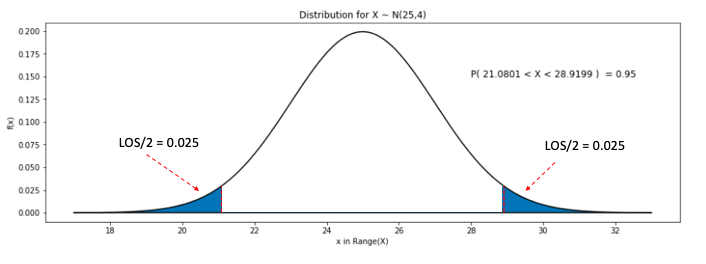      
          
**One-sided (Left) Critical Region:** The probability/area of the LOS is distributed
      entirely at the leftmost extreme of the distribution (here, we assume LOS = 10%):
      
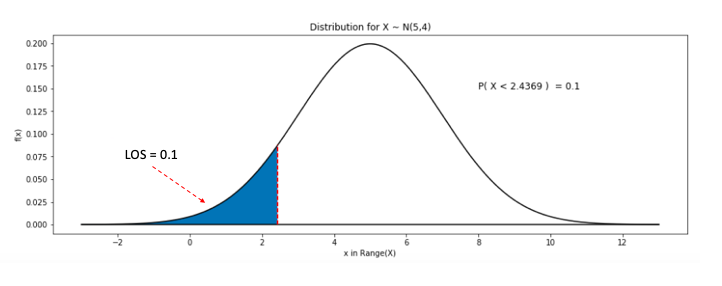

**One-sided (Right) Critical Region:** The probability/area of the LOS is distributed
      entirely at the rightmost extreme of the distribution (here, we assume LOS = 5%):
    
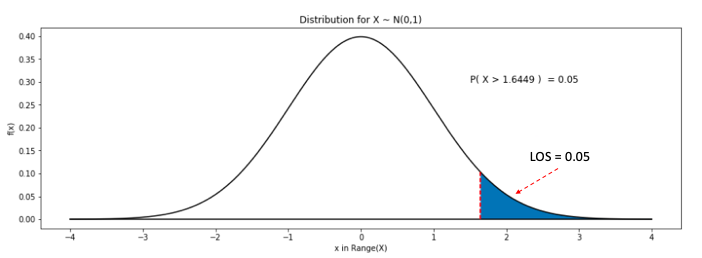

Which one to use depends on the experiment, and what you are trying to find out.
We will think about this for individual problems below and define which one to use.

###  How to use critical regions in your hypothesis tests

The procedure is then as follows:

1. State your hypothesis (in the form $\mu = k$ for some value $k$).
2. Figure out which of the three types of critical region is appropriate.
3. Give your LOS.
4. Calculate where the boundaries of the critical region are, given the distribution
   of the results of the experiment.
5. Perform the experiment, and if the result ends up in a critical region, **reject the hypothesis** otherwise **fail** to reject the hypothesis. 

Hint on the calculations: In step 4, for a two-sided test, use the `interval` function from the `norm` library; for a one-sided, use either `ppf` or `isf`. 


## Problem Four (Hypothesis Testing)

Suppose a random number generator for a Uniform Distribution in [0..1) is being tested.
We know what the theoretical mean and standard deviation are supposed to be (because we know how to find the details by looking up the Uniform Distribution in Wikipedia). 

We generate 100 random values and find the mean to be 0.4365. Since the mean value could be too low or too high, this is a two-sided test. 

(A) Test this result with 5% LOS. Show all work (i.e., give the bound calculated in step 4). 

(B) Repeat the test with 1% LOS. Again, show all work. 

Hint: If you write this in Python code, you can just cut and paste your solution from (A), changing one number, to get the solution to (B). 

#### A
Since the theoretical mean of a Uniform Distribution is 0.5, since we are using a Two Sided Critical Region with an LOS of 5%, we can calculate the boundaries for the intervals and we get:

In [23]:
np.round(norm.interval(alpha=0.95,loc=0.5,scale=0.25),4)

array([0.01, 0.99])

Hence I have failed to reject the hypothesis, as the value is inside the parameters.

#### B
If we repeat this with the exact same values except a LOS of 1% we get that the boundaries are:

In [24]:
np.round(norm.interval(alpha=0.99,loc=0.5,scale=0.25),4)

array([-0.144,  1.144])

Hence we have again failed to reject the hypothesis.

## Problem Five (Hypothesis Testing)

Suppose in the advertizing, Apple claims that the pens last an average of 1600 hours. We wish to test this claim, and so we set

$$H_0:\,\mu = 1600 \text{  hours}$$ 

and  a level of significance 

$$\alpha =  0.01.$$ 

 We do an experiment where 200 Apple Pens are tested and the mean of the lifetimes is found to be 1575 hours with a  sample standard deviation of 120 hours. Since this is a large sample (>30) we may use the sample standard deviation in place of the population standard deviation.

I really want to know is whether Apple is exaggerating, and the Pens actually have a lifetime much lower
than hypothesized. Therefore we use a **one-sided (left)** critical region: if
the pens perform really poorly, we will reject our hypothesis, but if they
perform much better than expected, we will be satisfied and NOT reject. 


(A) Perform the test as just stated. Show all work, including the boundary of the critical region. 

(B) Repeat the experiment with all parameters the same except make the sample size n = 100. Show all work. 



#### A
If we take as our LOS 1%, and hypothesis $H_0$, then we can see if it's inside the boundaries for our test using a one-sided critical region:

In [25]:
np.round(norm.ppf(q=0.01,loc=1600,scale=120/200),4)

1598.6042

Since we can clearly see that the obtained value is lower than the boundarie, so we reject the hypothesis.


#### B
If we apply the same formula to a sample size of 100, we get that:

In [26]:
np.round(norm.ppf(q=0.01,loc=1600,scale=120/100),4)

1597.2084

Once again the value obtained is lower than the one advertised, so we reject our hypothesis.

## Problem Six (Hypothesis Testing)

Suppose I want to test if Zichen claims to have Extrasensory Perception (ESP), and 
that if I draw a card drawn randomly and with replacement from
an ordinary deck of cards, he can guess the suit without seeing the card.

I am sceptical and propose to test his claim.  I formulate the hypothesis that
when he tells me the suit, he is just guessing and the probability of his getting
it right is 25%. 

Therefore, I perform 100 trials where I shuffle the deck, draw a card, ask him to guess the suit, and then replace the card. 

I decide that since ESP is about guessing the card's suit correctly, I will make this a one-sided (right) test with LOS = 0.05. 

We perform the test and Zichen identifies 32 of the cards correctly. 

Now at this point, I realize that if I use the normal distribution, it will be an estimate, and I am not sure how well it will work, because B(100,0.25) is not symmetric. 
So I decide for maximum precision I'll use the binomial directly, but how to calculate an LOS that goes along with a *discrete* distribution (think about how to calculate the top 1% of B(3,1/2)!)? 

So I decide to reason backwards: I'll calculate $P(X > 32)$  and see if it is less than my LOS (which would mean it has to be in the critical region). 



(A) Perform the test as specified. Reject if $P(X > 32) < LOS$  and fail to reject otherwise. 

(B) What is the smallest number of cards Zichen would have to identify to
make me reject my hypothesis at the 1% LOS?

Hint: use `binom.cdf`.  

#### A
Using $H_0$ = P(X>32) = 

In [27]:
np.round(1 - binom.cdf(k=32, n=100, p=0.25),4)

0.0446

Using the logic above, $H_0 \leq LOS$ so we reject the Hypothesis.


#### B
According to a few tests, the smallest number of cards he would have to guess for you to reject your hypothesis at the 1% LOS is: 35

In [34]:
np.round(1 - binom.cdf(k=35, n=100, p=0.25),4)

0.0094

## Problem Seven (Exponential)

In the following assume that we are dealing with Poisson processes and can use the exponential distribution.

(a) Suppose that every three months , on average, an earthquake occurs in
California. What is the probability that the next earthquake occurs after three but before
seven months?

(b) Suppose we model time to failure of TV tubes as an exponential random variable and that tubes fail on average after 10 years. 
If Jim bought his TV set 10 years ago, what is the probability that its tube
will last another 10 years?

Hint: Make sure in both these you understand the difference between the rate parameter $\lambda$ (= mean number of arrivals per unit time) and $\beta \,=\, 1/\lambda$ (= mean interarrival time). 

#### A
Let our unit of time be a month, so for A, $𝜆 = \frac{1}{3}$ and $𝛽 = 3$, if we apply the formula for Poisson Random Variables we get that the probability of an earthquake to occur between 3-7 months is:

In [29]:
np.round(expon.cdf(x=7,loc=0,scale=3) - expon.cdf(x=3,loc=0,scale=3),4)

0.2709

#### B
With our unit of time being a year this time around, we have that: $𝜆 = \frac{1}{10}$ and $𝛽 = 10$, so by pluging this into our formula again we get that:

In [30]:
np.round(expon.cdf(x=20,loc=0,scale=10) - expon.cdf(x=10,loc=0,scale=10),4)

0.2325

## Problem Eight (Exponential)

In the following assume that we are dealing with Poisson processes and can use the exponential distribution.

(A)  Suppose that, on average, two earthquakes occur in San Francisco
and two in Los Angeles every year. If the last earthquake in San Francisco occurred 10
months ago and the last earthquake in Los Angeles occurred two months ago, what is the
probability that the next earthquake in San Francisco occurs after the next earthquake in
Los Angeles?

(B) Suppose that the time it takes for a new assistant to type a document is exponential
with mean 1 hour. If at the beginning of a certain eight-hour working day
the assistant receives 12 documents to type, what is the probability that he or she will
finish them all by the end of the day?

Hint: There is a very simple answer to (A) if you use the principle of "symmetry" that
we have mentioned several times in class. Otherwise, you can do the calculation....

#### A
Considering that the two events are equiprobable, and seemingly independent, and memoryless and symmetric, then the probability of an earthquake hitting SF before LA is the same as one hitting LA before SF, hence the probability of such event is 0.5

#### B
Let our timeframe be a single work-day, or 8 hours. With this our lambda will be 8.

So, using the inverse method we get that:

$P(X \geq 12) = 1 - P(X < 12) = 1 - (P(11) + P(10) + P(9) + P(8) + P(7) + P(6) + P(5) + P(4) + P(3) + P(2) + P(1) + P(0)) = 1 - 0.8880 = 0.112$

## Problem Nine (Poisson Distribution)

The atoms of gram of Uranium 237 are disintegratings randomly with an average rate of 3.9 alpha particles per second. 

What is the probability that in the next second, the number
of alpha particles emitted is

(A) Exactly 4?

(B)  At least 2?

(C) Between 3 and 6 (inclusive)?

Now consider:

(D) What is the probability that for a period of five seconds, there are no emissions?

(E) Suppose for a period of five seconds there are no emissions.  What is the probability that there are at least 2 emissions in the next second following this period? 

#### A
$P(X=4) = f_x(4) = \frac{e^{-3.9} 3.9^4}{4!} = 0.1951$

#### B
$P(X>2) = 1 - P(X=1) - P(X=0) = \frac{e^{-3.9} 3.9^1}{1!} - \frac{e^{-3.9} 3.9^0}{0!} = 1 - 0.0789 - 0.0202 = 0.9008$

#### C
$P(3 \leq X \leq 6) = P(3) + P(4) + P(5) + P(6) = 0.6464$

#### D
For this exercise, I'll assume that the average rate of decay for 5 seconds is $3.9 \times 5 = 19.5$, and will use that has lambda.

$P(X=0) = f_x(0) = \frac{e^{-19.5} 19.5^0}{0!} = 3.3982 \times 10^{-9}$


#### E
Since the probability is memoryless, the probability of 2 emissions after 5 seconds of no emissions is the same as the probability of 2 emissions after a period of any amount of emissions, so it's just a matter of plugging it into the formula:

$P(X=2) = f_x(2) = \frac{e^{-3.9} 3.9^2}{2!} = 0.1539$

## Problem Ten (Poisson)

Passengers are making reservations for the Jetblue flight at 9pm the night before Thanksgiving, at a Poisson rate of 3 reservations per 8
hours. If 24 seats are made available for the flight two days (48 hours) before the flight, and passengers make reservations at the same rate
for the whole 48 hours, what is the probability that by the time of the flight, all 24 seats have been reserved?

Hint: Use the Inverse Method: figure out the probability that less than 24 people made reservations. 

#### Answer

Firstly, lets adapt our timeframe, if 3 reservations are made in 8 hours on average, then in 48 hours we will have, on average, 18 reservations, thus giving us a lambda of 18 for a time frame of 48h.

Now, we will calculate how likely it is for less than 24 people to reserve seats in this time frame by calculating:

$P(X<24) = \sum_{k=0}^{23} \frac{e^{-18} 18^k}{k!} = 0.8989$

From here, we apply the inverse method and get the probability of all 24 seats to be filled in 48h to be: $1 - 0.8989 = 0.1011$

## Problem Eleven (Poisson)

Suppose that earthquakes occur in a certain region of Califormia, following a Poisson Distribution, at a rate of 7 per year. 

(A)  What is the probability of no earthquakes next year?

(B)  Suppose next year there are NO earthquakes; what is the probability
that in each of the following two years, there will be at least one earthquakes
during that entire two-year period?

(C)  What is the probability that in exactly three of the next eight years no earthquakes will occur?

Hint: You'll need to use the Poisson plus another discrete distribution for (C).  

#### A
This problem gives us a timeframe of 1 year, and a lambda of 7, so:

$P(X=0) = \frac{e^{-7} 7^0}{0!} = 0.0009$

#### B
Since Poisson Distribution is memoryless (due to its properties), the fact that the first year has no earthquakes means nothing. As for the calculation of 1 earthquake in a two year period, I'll be changing the timeframe to 2 years, and so the average amount of events (lambda) to 14:

$P(X=0) = \frac{e^{-14} 14^1}{1!} = 1.2 \times 10^{-5}$


#### C
Since the events (earthquakes in a specific year) are independent, then we must have at least 3 of the years that have 0 earthquakes, and the rest doesn't matter, then we are left with the following calculation:

$P(X=0)^3 * 1 = 0.0009^3 = 7.29 \times 10^{-10}$

## Problem Twelve (Poisson compared with Exponential)

Suppose the emergency room at Mass General opens at 6am and has a mean arrival rate throughout the day of 6.9 patients per hour (that is<span> &lambda;</span> = 6.9). </p>
<p>(A) What is the probability that 12 patients arrive between 6am and 7am?</p>
<p>(B) What is the probability that no patient arrives before 7am?</p>
<p>(C) What is the probability that<span> the first</span> patient arrives between 6am and 7am? </p>
<p>(D) What is the probability that<span> the first</span> patient arrives between 6:15 and 6:45? </p>
<p>(E) Suppose it is 6:15 and no patient has arrived yet; now what is the probability that<span> the first</span> patient arrives between 6:15 and 6:45? </p>
<p>Hint: Use the Poisson for (A) and (B) and the Exponential for (C), (D), and (E).  
Note carefully how (D) and (E) are different: in (D) it is possible that the first patient arrives between 6am and 6:15am, whereas for (E) you know this has not happened. 
The result for the two will be different!

</p>

#### A
$P(X=12) = \frac{e^{-6.9} 6.9^12}{12!} = 0.0245$

#### B
$P(X=0) = \frac{e^{-6.9} 6.9^0}{0!} = 0.001$

#### C


In [31]:
np.round(expon.cdf(x=1,loc=0,scale=1/6.9),4)

0.999

#### D

In [32]:
np.round(expon.cdf(x=3/4,loc=0,scale=1/lam) - expon.cdf(x=1/4,loc=0,scale=1/lam), 4)

0.3181

#### E
Since the exponentional distribution is memoryless, the probability of the first patient arriving between 6:15 and 6:45 when no patient has arrived beforehand, is the same as the probability of the first patient arriving in the first half hour:

In [33]:
np.round(expon.cdf(x=1/2,loc=0,scale=1/6.9),4)

0.9683